In [24]:
#IRIS DATASET - K Means

from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd

In [25]:
iris_new = load_iris()

In [26]:
#Convert into dataframe 
iris = pd.DataFrame(iris_new.data)

In [27]:
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
iris_new.feature_names #Column Names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
#Passing the feature Names in IRIS DF
iris.columns = iris_new.feature_names

In [30]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
#Import the Kmeans 
from sklearn.cluster import KMeans

In [32]:
#K means Classifer
model = KMeans(n_clusters=3) #Setosa, versicolor , Virginica

In [33]:
#Fit the model and then predict it 
model.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
labels = model.predict(iris)

In [35]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [36]:
iris.shape

(150, 4)

In [37]:
#Finding the centroids 
centroids = model.cluster_centers_

In [38]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [39]:
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

In [40]:
xs = iris_new.data[:,0]
ys = iris_new.data[:,1]

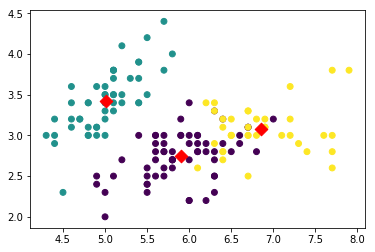

In [41]:
import matplotlib.pyplot as plt 
plt.scatter(xs,ys,c=labels,s = 35)
plt.scatter(centroid_x, centroid_y, marker='D', c = 'r',s = 80)
plt.show()

In [43]:
#Elbow Method - Find the optimal Value of Clusters 
ks = range(1,7)
inertias = []

In [44]:
for k in ks:
    #Define the model 
    model = KMeans(n_clusters=k)
    #Fit the model
    model.fit(iris)
    #Append the Inertias
    inertias.append(model.inertia_)

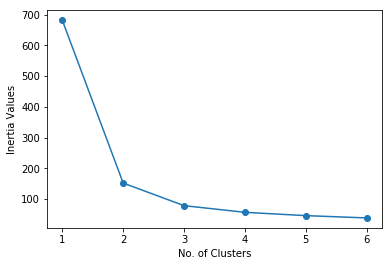

In [47]:
plt.plot(ks,inertias,"-o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia Values")
plt.xticks(ks)
plt.show()

# Auto MPG Dataset

In [125]:
car = pd.read_csv("car-mpg.csv")

In [126]:
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [127]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [128]:
car.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [129]:
car.shape

(398, 10)

In [130]:
car.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [131]:
car[car.hp=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [132]:
car[car.hp!="?"].hp.median()

93.5

In [133]:
#Replace the Q Mark with values
car = car.replace('?',np.nan)
a = car['hp'].median()
car = car.fillna(a)

In [134]:
car['hp'] = car.hp.astype("float64")
car.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [135]:
car.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [113]:
car.hp.nunique()

0

In [136]:
ks = range(1,11)
inertias = []
for k in ks:
    #Define the model 
    model = KMeans(n_clusters=k)
    #Fit the model
    model.fit(car.drop('car_name',axis=1))
    #Append the Inertias
    inertias.append(model.inertia_)

inertias


[289635443.88678396,
 74289634.45767164,
 34208198.12144323,
 19056714.15824808,
 13769798.476304416,
 10294342.029308936,
 7662902.879137042,
 5662662.194042871,
 4810403.970745761,
 4030546.9763000254]

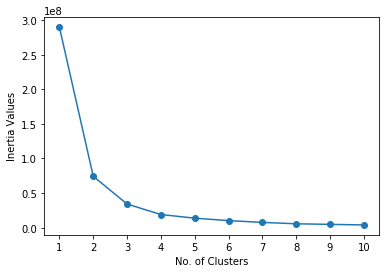

In [137]:
plt.plot(ks,inertias,"-o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia Values")
plt.xticks(ks)
plt.show()

In [140]:
model = KMeans(n_clusters=4)
model.fit(car.drop('car_name',axis=1))
labels = model.predict(car.drop('car_name',axis=1))
labels

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2,
       1, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 3, 3, 1, 1, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 3, 3, 2, 2, 2, 2,
       2, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 0, 2, 2, 2, 1, 3, 3, 3, 3,

In [141]:
centroids = model.cluster_centers_
centroids

array([[1.39913043e+01, 8.00000000e+00, 3.56536232e+02, 1.65130435e+02,
        4.36659420e+03, 1.30420290e+01, 7.36086957e+01, 1.00000000e+00,
        3.33066907e-16],
       [2.45540000e+01, 4.71000000e+00, 1.55100000e+02, 9.43150000e+01,
        2.75536000e+03, 1.57670000e+01, 7.72300000e+01, 1.55000000e+00,
        6.50000000e-01],
       [3.07471429e+01, 3.97857143e+00, 9.81107143e+01, 7.35107143e+01,
        2.10913571e+03, 1.66028571e+01, 7.65928571e+01, 2.16428571e+00,
        1.00000000e+00],
       [1.83528090e+01, 6.64044944e+00, 2.59966292e+02, 1.16808989e+02,
        3.48448315e+03, 1.56752809e+01, 7.55842697e+01, 1.11235955e+00,
        6.74157303e-02]])

In [142]:
centroid_x = centroids[:,0] #Here we are considering the mpg and disp which have the direct relationship with average of car
centroid_y = centroids[:,3]

df1 = car.drop('car_name',axis=1)
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [151]:
xs = df1.iloc[:,0]
ys = df1.iloc[:,3]

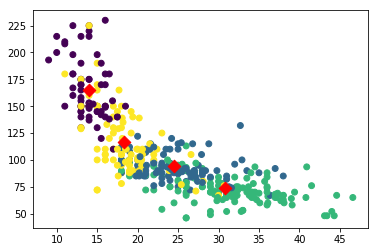

In [144]:
import matplotlib.pyplot as plt 
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker='D',c='r',s=80)
plt.show()

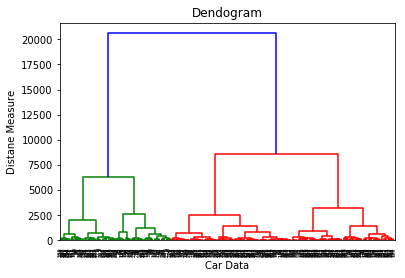

In [152]:
dendogram = sch.dendrogram(sch.linkage(car.drop('car_name',axis=1),method="ward"))
plt.title("Dendogram")
plt.xlabel("Car Data")
plt.ylabel("Distane Measure")
plt.show()

# Dendogram for Iris

In [149]:
import scipy.cluster.hierarchy as sch

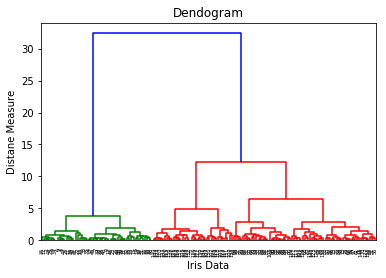

In [150]:
dendogram = sch.dendrogram(sch.linkage(iris,method="ward"))
plt.title("Dendogram")
plt.xlabel("Iris Data")
plt.ylabel("Distane Measure")
plt.show()

# Calculate the Euclidean Distance

In [145]:
x = [[-1,2,3]]
y = [[4,0,-3]]

In [146]:
from sklearn.metrics.pairwise import euclidean_distances

In [147]:
euclidean_distances(x,y)

array([[8.06225775]])